# **1) CARGA DE DATOS**

Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [72]:
#incluimos los módulos y sub módulos que vamos a usar
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [73]:
#Lectura del documento de la BBDD
h = pd.read_excel("BBDD_Hospitalización.xlsx")

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [74]:
#Impresión de datos
print(h)

     EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES    PSA BIOPSIAS PREVIAS  \
0    53.0       NO                         NO   4.00               NO   
1    56.0       NO                         NO   7.70               NO   
2    57.0       NO                         NO  29.00               SI   
3    56.0       NO                         NO   7.00               NO   
4    55.0       NO                         NO  29.00               SI   
..    ...      ...                        ...    ...              ...   
565  69.0       NO                         NO   4.43              NaN   
566  67.0       NO                         NO   8.00               NO   
567  59.0       NO                         NO   9.00               SI   
568   NaN      NaN                        NaN    NaN              NaN   
569   NaN      NaN                        NaN    NaN              NaN   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                   SI          FLUOROQUINOLONA_AMINOGLIC

# **2) ANÁLISIS EXPLORATORIO DE DATOS**

# *2.1)PREPROCESAMIENTO*

### `1. Valores faltantes`:

In [75]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Se identifica que durante el proceso de importación fueron incorporadas dos filas al final con valores nulos.

In [76]:
h.iloc[[-2,-1],:]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se procede a eliminar las dos últimas filas.

In [77]:
h.drop([568,569], axis=0, inplace=True)
h

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
564,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0


In [78]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Se procede a buscar datos duplicados.

In [79]:
h[h.duplicated()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
32,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
42,62.0,NO,NO,16.0,NO,SI,OROQUINOLONAS,12.0,NO,SI,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
43,69.0,NO,NO,17.0,SI,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
45,66.0,NO,NO,6.4,NO,SI,OTROS,12.0,NO,SI,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
49,68.0,NO,NO,20.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,SI,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,66.0,NO,NO,18.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
555,67.0,NO,NO,8.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
557,59.0,NO,NO,16.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
560,57.0,NO,NO,4.8,NO,NO,OTROS,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [80]:
print('La cantidad de registros duplicados fueron:', h.duplicated().sum())

La cantidad de registros duplicados fueron: 108


Se eliminan los registros duplicados:

In [81]:
h.drop_duplicates(inplace = True)

In [82]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       460 non-null    float64
 1   DIABETES                                                                   460 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 460 non-null    object 
 3   PSA                                                                        456 non-null    float64
 4   BIOPSIAS PREVIAS                                                           458 non-null    object 
 5   VOLUMEN PROSTATICO                                                         459 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

#### **`1. Pasemos al tratamiento de los valores faltantes`**

In [83]:
#!pip install missingno
import missingno as msno

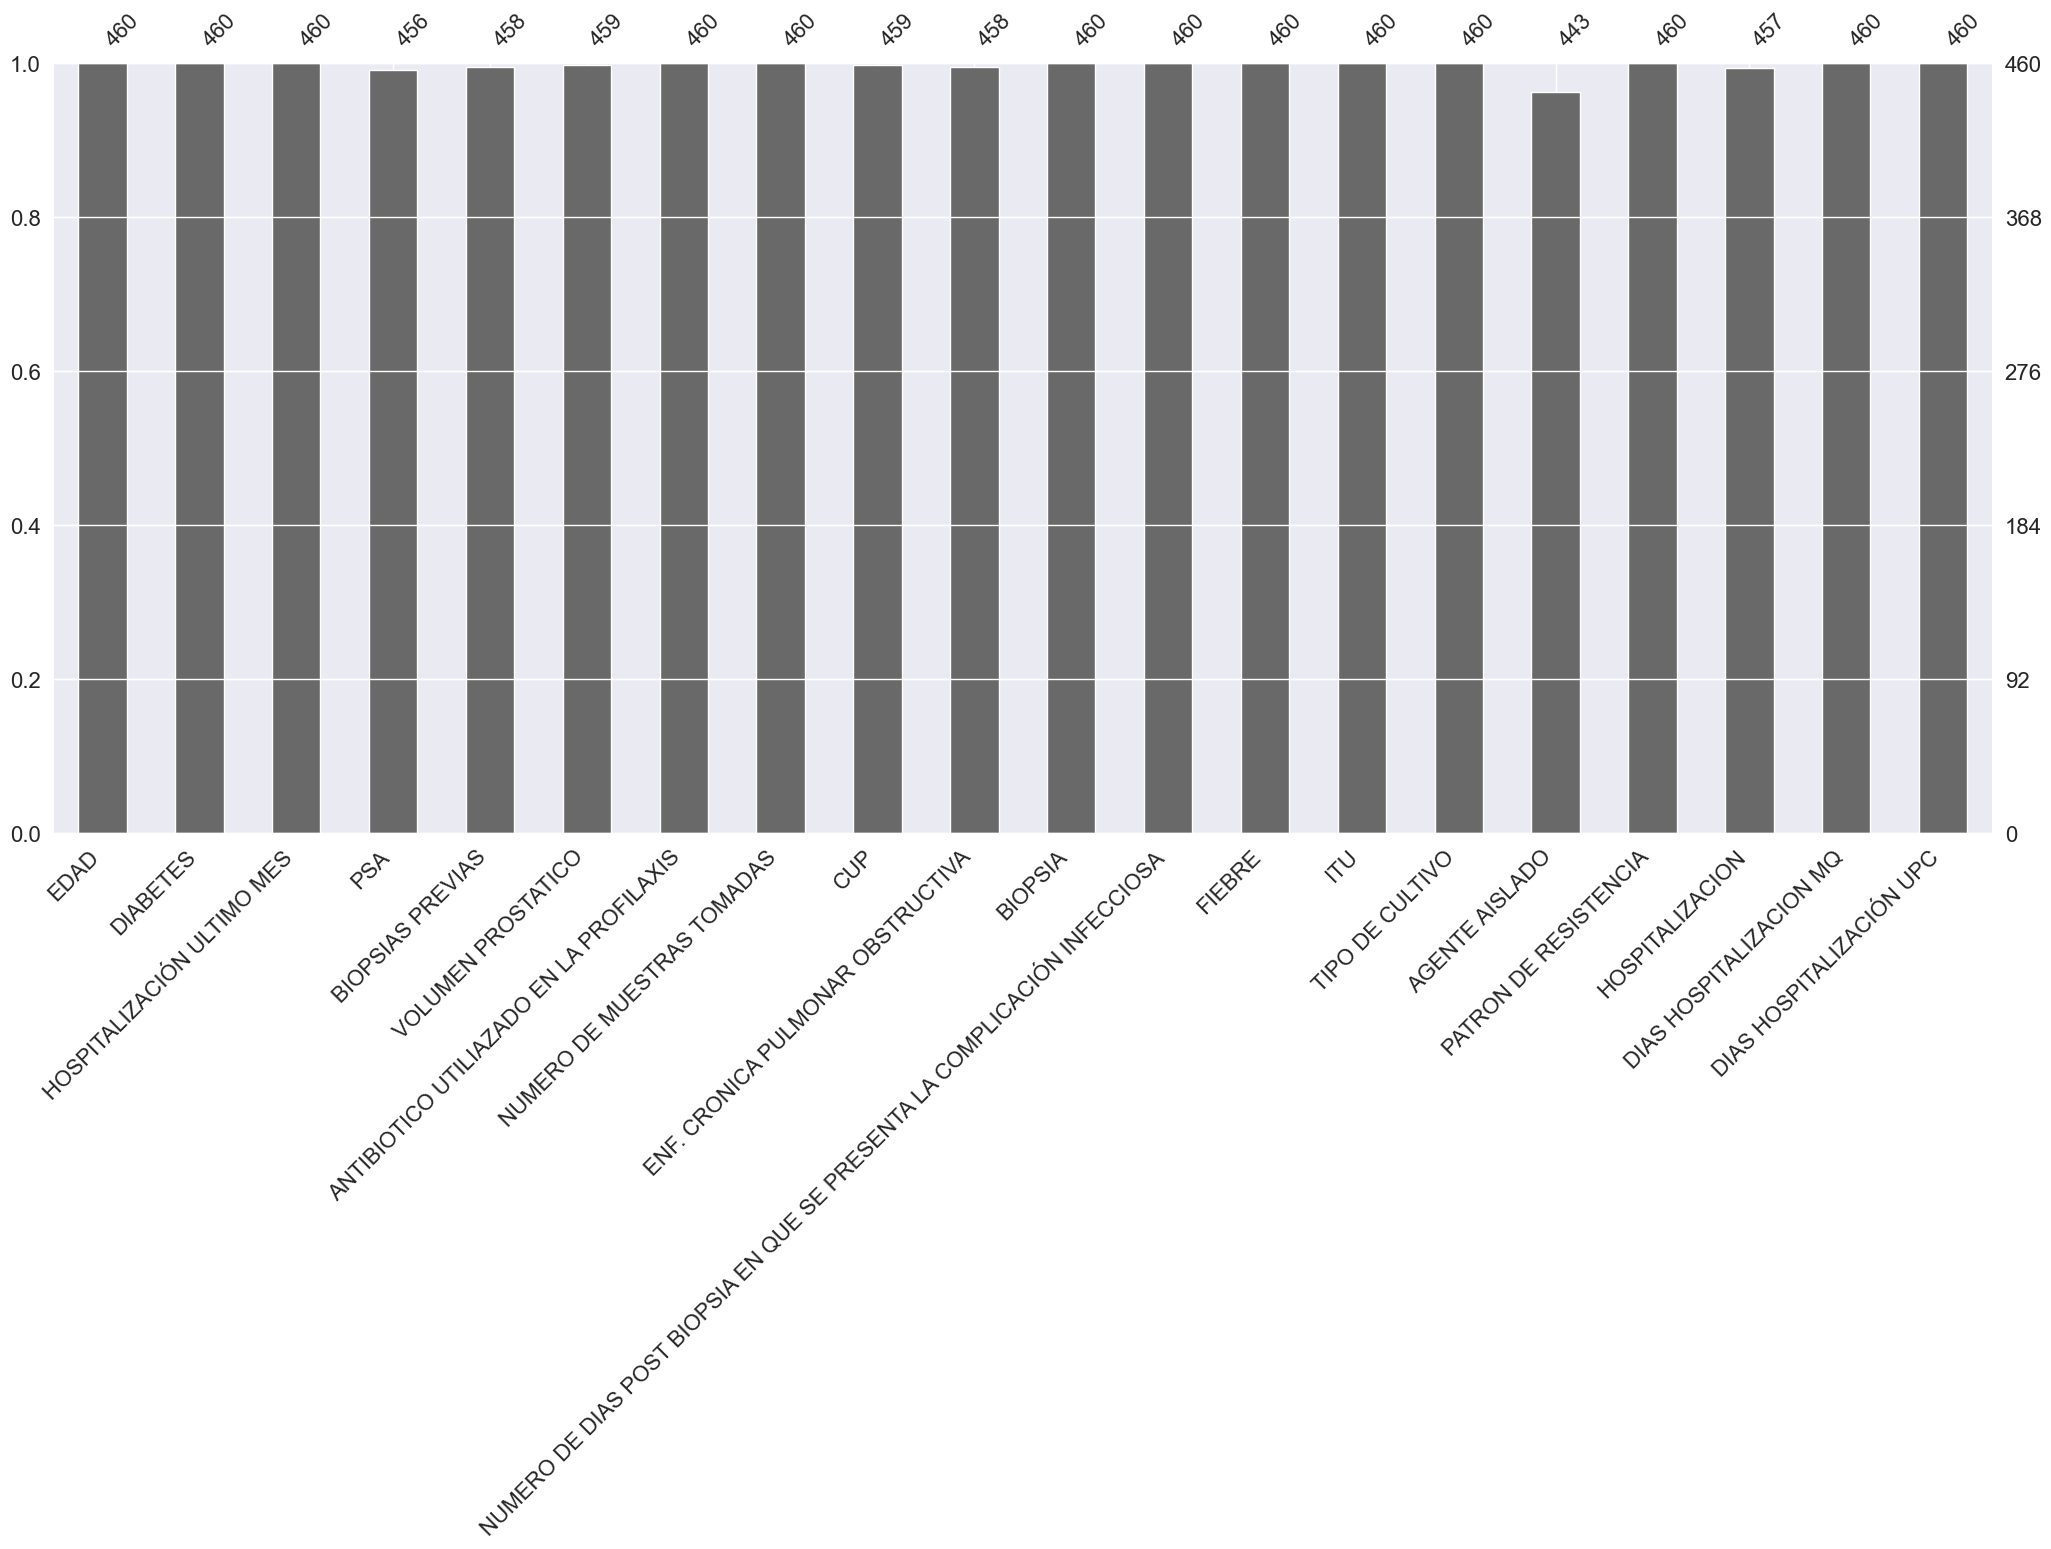

In [84]:
msno.bar(h)
plt.show()

#### Se identifican un total de `460 registros` de los cuales algunas columnas presentan valores faltantes:

In [85]:
h.isnull().sum()

EDAD                                                                          0
DIABETES                                                                      0
HOSPITALIZACIÓN ULTIMO MES                                                    0
PSA                                                                           4
BIOPSIAS PREVIAS                                                              2
VOLUMEN PROSTATICO                                                            1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       0
NUMERO DE MUESTRAS TOMADAS                                                    0
CUP                                                                           1
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
BIOPSIA                                                                       0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     0
FIEBRE                                  

Se calcula el porcentaje de valores faltantes.

In [86]:
round(h.isnull().sum()*100/len(h))

EDAD                                                                         0.0
DIABETES                                                                     0.0
HOSPITALIZACIÓN ULTIMO MES                                                   0.0
PSA                                                                          1.0
BIOPSIAS PREVIAS                                                             0.0
VOLUMEN PROSTATICO                                                           0.0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0.0
NUMERO DE MUESTRAS TOMADAS                                                   0.0
CUP                                                                          0.0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0.0
BIOPSIA                                                                      0.0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0.0
FIEBRE                      

El porcentaje de valores faltantes es muy bajo por lo cual se aplicará una tecnica de imputación. A excepción del Agente Aislado que presenta un 4,0% de valores faltantes.

Evaluamos cómo se distribuyen la variable PSA

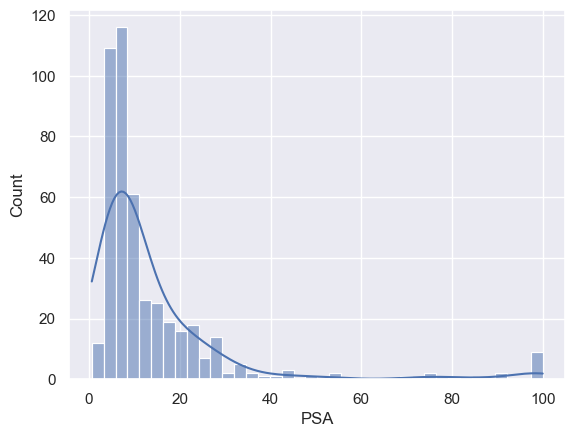

In [87]:
sns.histplot(data = h['PSA'], kde = True)
plt.show()

El promedio de la distribución es representativo. Se realizará una imputación simple.

In [88]:
h['PSA'].mean()

14.065921052631579

In [89]:
from sklearn.impute import SimpleImputer

# Definimos, en strategy, la estrategia que usaremos para la imputación. En este caso, utilizamos una medida de tendencia central.
# Más específicamente, la media

imputer = SimpleImputer(strategy = 'mean')

In [90]:
imputer.fit(h[['PSA']])

h['PSA'] = imputer.transform(h[['PSA']])

In [91]:
h['PSA'].mean()

14.065921052631579

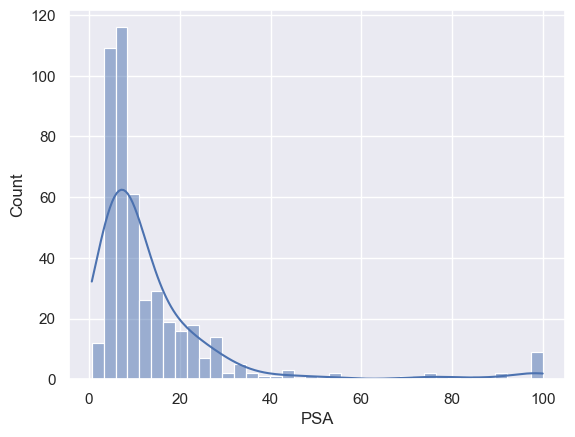

In [92]:
#Veamos cómo se distribuye, posterior a la imputación 
sns.histplot(data = h['PSA'], kde = True)
plt.show()

Vemos que ahora el % de datos faltantes de la columna PSA es 0,0%

In [93]:
round(h.isnull().sum()*100/len(h))

EDAD                                                                         0.0
DIABETES                                                                     0.0
HOSPITALIZACIÓN ULTIMO MES                                                   0.0
PSA                                                                          0.0
BIOPSIAS PREVIAS                                                             0.0
VOLUMEN PROSTATICO                                                           0.0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0.0
NUMERO DE MUESTRAS TOMADAS                                                   0.0
CUP                                                                          0.0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0.0
BIOPSIA                                                                      0.0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0.0
FIEBRE                      

#### Las variables 'AGENTE AISLADO' y 'HOSPITALIZACION' son variable no numéricas. Utilizaremos un modelo de imputación, posterior al encoding de las variables cualitativas.

Encoding: Label_encoding

In [94]:
h['AGENTE AISLADO'].unique()

array(['NO', 'E.COLI', 'PSEUDOMONAS AERUGINOSA', nan], dtype=object)

In [95]:
diccionario = {'NO':0, 'E.COLI':1 , 'PSEUDOMONAS AERUGINOSA':2}
diccionario

{'NO': 0, 'E.COLI': 1, 'PSEUDOMONAS AERUGINOSA': 2}

In [96]:
h['AGENTE AISLADO N'] = h['AGENTE AISLADO'].map(diccionario)

In [97]:
h['AGENTE AISLADO N']

0      0.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
563    0.0
564    0.0
565    0.0
566    NaN
567    0.0
Name: AGENTE AISLADO N, Length: 460, dtype: float64

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Imputacion en 'AGENTE AISLADO N' (Variable numerica correspondiente a la variable no numerica 'AGENTE AISLADO'):

In [98]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 567
Data columns (total 21 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       460 non-null    float64
 1   DIABETES                                                                   460 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 460 non-null    object 
 3   PSA                                                                        460 non-null    float64
 4   BIOPSIAS PREVIAS                                                           458 non-null    object 
 5   VOLUMEN PROSTATICO                                                         459 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

In [99]:
h['AGENTE AISLADO N'].mean()

0.022573363431151242

In [100]:
imputer.fit(h[['AGENTE AISLADO N']])

h['AGENTE AISLADO N'] = imputer.transform(h[['AGENTE AISLADO N']])

In [101]:
h['AGENTE AISLADO N'].mean()

0.022573363431151242

In [102]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 567
Data columns (total 21 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       460 non-null    float64
 1   DIABETES                                                                   460 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 460 non-null    object 
 3   PSA                                                                        460 non-null    float64
 4   BIOPSIAS PREVIAS                                                           458 non-null    object 
 5   VOLUMEN PROSTATICO                                                         459 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

Encoding: Label_encoding

In [103]:
h['HOSPITALIZACION'].unique()

array(['SI', 'NO', nan], dtype=object)

In [104]:
diccionario2 = {'SI':0, 'NO':1}
diccionario2

{'SI': 0, 'NO': 1}

In [105]:
h['HOSPITALIZACION N'] = h['HOSPITALIZACION'].map(diccionario2)

Imputacion en 'HOSPITALIZACION N' (Variable numerica correspondiente a la variable no numerica 'HOSPITALIZACION'):

In [106]:
h['HOSPITALIZACION N'].mean()

0.9474835886214442

In [107]:
imputer.fit(h[['HOSPITALIZACION N']])

h['HOSPITALIZACION N'] = imputer.transform(h[['HOSPITALIZACION N']])

In [108]:
h['HOSPITALIZACION N'].mean()

0.9474835886214442

In [109]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 567
Data columns (total 22 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       460 non-null    float64
 1   DIABETES                                                                   460 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 460 non-null    object 
 3   PSA                                                                        460 non-null    float64
 4   BIOPSIAS PREVIAS                                                           458 non-null    object 
 5   VOLUMEN PROSTATICO                                                         459 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

Confirmamos que no existen registros faltantes en las variables 'AGENTE AISLADO N' y 'HOSPITALIZACION N'.

In [110]:
round(h.isnull().sum()*100/len(h))

EDAD                                                                         0.0
DIABETES                                                                     0.0
HOSPITALIZACIÓN ULTIMO MES                                                   0.0
PSA                                                                          0.0
BIOPSIAS PREVIAS                                                             0.0
VOLUMEN PROSTATICO                                                           0.0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0.0
NUMERO DE MUESTRAS TOMADAS                                                   0.0
CUP                                                                          0.0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0.0
BIOPSIA                                                                      0.0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0.0
FIEBRE                      

### `2. Valores atipicos`:

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

#### Variables Cuantitativas

In [111]:
h.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,AGENTE AISLADO N,HOSPITALIZACION N
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,64.213043,14.065921,12.923913,0.204348,0.017391,0.022573,0.947484
std,9.817853,16.969179,3.970572,1.061088,0.218236,0.173232,0.222579
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,0.000000,0.000000,0.000000,1.000000
50%,64.000000,8.100000,12.000000,0.000000,0.000000,0.000000,1.000000
75%,69.000000,15.812500,12.000000,0.000000,0.000000,0.000000,1.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000,2.000000,1.000000


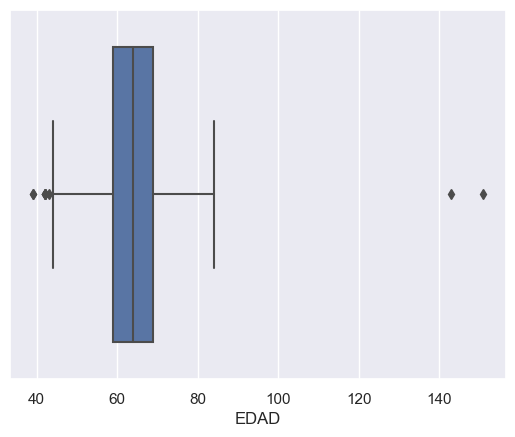

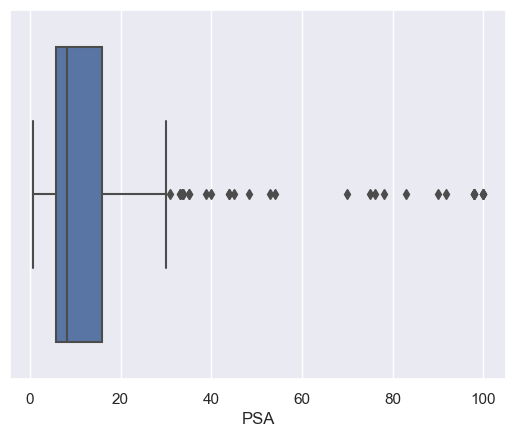

In [112]:
#Variables continuas
sns.boxplot(x = 'EDAD', data = h)
plt.show()
sns.boxplot(x = 'PSA', data = h)
plt.show()

*El diagrama de cajas nos permite identificar fácilmente, y de forma visual, si tenemos outliers.*

In [113]:
#VARIABLE EDAD
Q1 = h['EDAD'].quantile(0.25)
Q3 = h['EDAD'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
print("VARIABLE EDAD")
print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

#VARIABLE PSA
Q1_ = h['PSA'].quantile(0.25)
Q3_ = h['PSA'].quantile(0.75)
IQR_ = Q3_ - Q1_
BI_ = Q1_ - 1.5*IQR_
BS_ = Q3_ + 1.5*IQR_
print("VARIABLE PSA")
print(Q1_)
print(Q3_)
print(IQR_)
print(BI_)
print(BS_)

VARIABLE EDAD
59.0
69.0
10.0
44.0
84.0
VARIABLE PSA
5.7
15.8125
10.1125
-9.46875
30.981250000000003


In [114]:
print("VARIABLE EDAD")
print('Cantidad de registros totales:', h.shape[0])
print('Cantidad de outliers:', h[(h['EDAD']<BI) | (h['EDAD']>BS)].shape[0] )
print("VARIABLE PSA")
print('Cantidad de registros totales:', h.shape[0])
print('Cantidad de outliers:', h[(h['PSA']<BI_) | (h['PSA']>BS_)].shape[0] )

VARIABLE EDAD
Cantidad de registros totales: 460
Cantidad de outliers: 10
VARIABLE PSA
Cantidad de registros totales: 460
Cantidad de outliers: 32


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello, recurrimos al siguiente bloque de código

In [115]:
out_EDAD = (h['EDAD']<BI) | (h['EDAD']>BS) 
h = h[~out_EDAD]

In [116]:
print('Tamaño del dataset, luego de eliminar outliers en la variable EDAD:', h.shape[0])

Tamaño del dataset, luego de eliminar outliers en la variable EDAD: 450


In [117]:
out_PSA = (h['PSA']<BI_) | (h['PSA']>BS_) 
h = h[~out_PSA]

In [118]:
print('Tamaño del dataset, luego de eliminar outliers en la variable PSA:', h.shape[0])

Tamaño del dataset, luego de eliminar outliers en la variable PSA: 420


In [119]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 567
Data columns (total 22 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       420 non-null    float64
 1   DIABETES                                                                   420 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 420 non-null    object 
 3   PSA                                                                        420 non-null    float64
 4   BIOPSIAS PREVIAS                                                           418 non-null    object 
 5   VOLUMEN PROSTATICO                                                         419 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

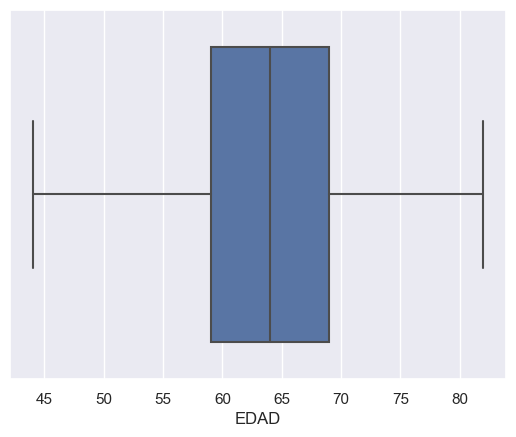

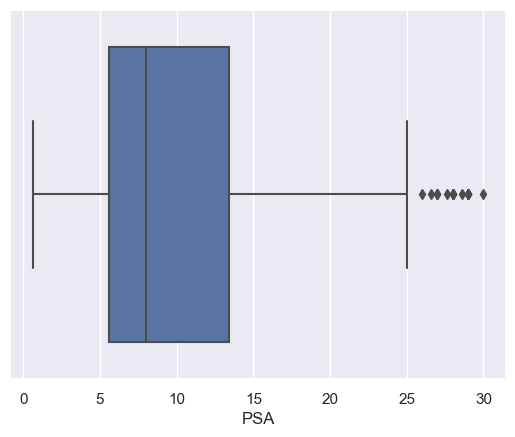

In [120]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x = 'EDAD', data = h)
plt.show()
sns.boxplot(x = 'PSA', data = h)
plt.show()

#### Variables Cualitativas

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [121]:
h.nunique()

EDAD                                                                          38
DIABETES                                                                       2
HOSPITALIZACIÓN ULTIMO MES                                                     2
PSA                                                                          125
BIOPSIAS PREVIAS                                                               2
VOLUMEN PROSTATICO                                                             2
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                        5
NUMERO DE MUESTRAS TOMADAS                                                    12
CUP                                                                            2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                              4
BIOPSIA                                                                       10
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA      6
FIEBRE                      

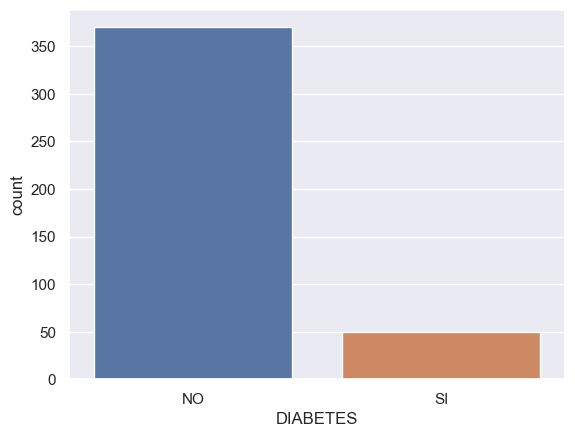

In [122]:
sns.countplot(x='DIABETES', data=h) 
plt.show()

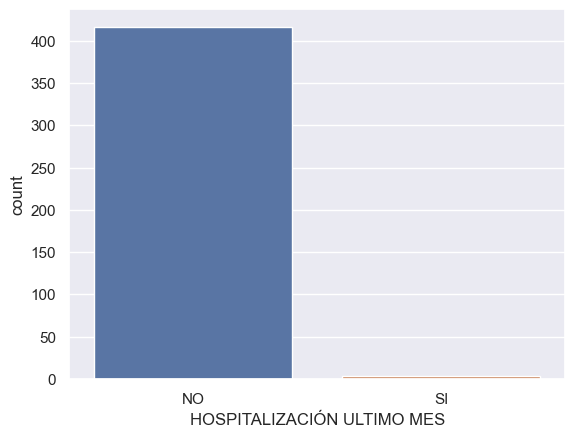

In [123]:
sns.countplot(x='HOSPITALIZACIÓN ULTIMO MES', data=h) 
plt.show()

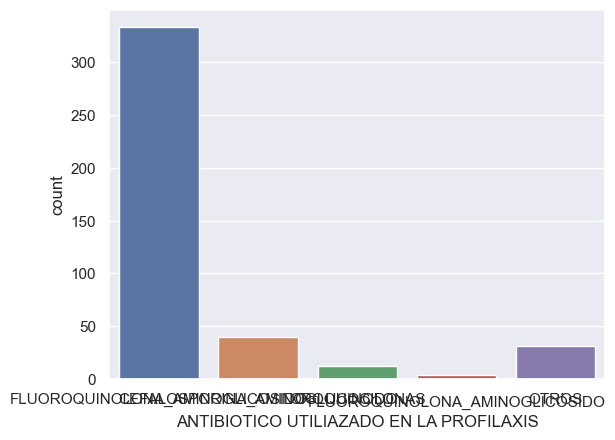

In [124]:
sns.countplot(x='ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', data=h) 
plt.show()

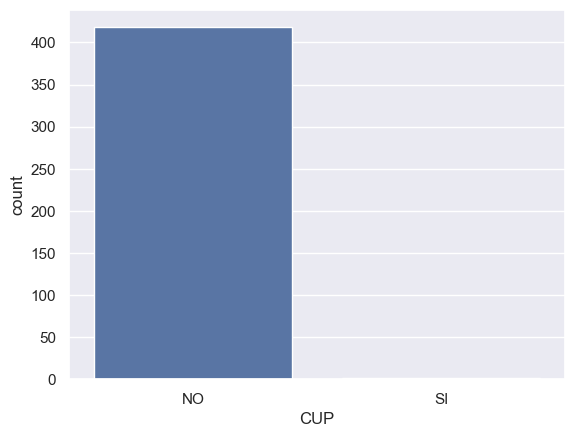

In [125]:
sns.countplot(x='CUP', data=h) 
plt.show()

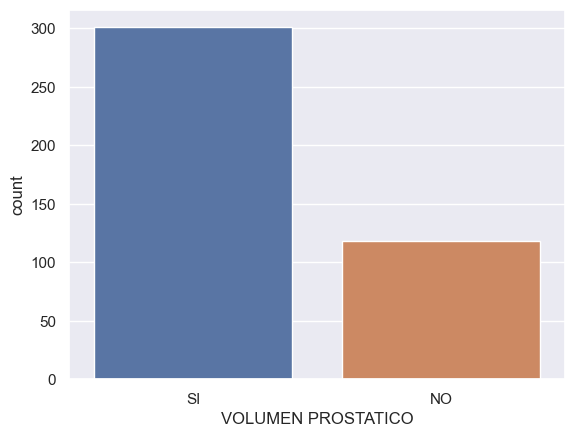

In [126]:
sns.countplot(x='VOLUMEN PROSTATICO', data=h) 
plt.show()

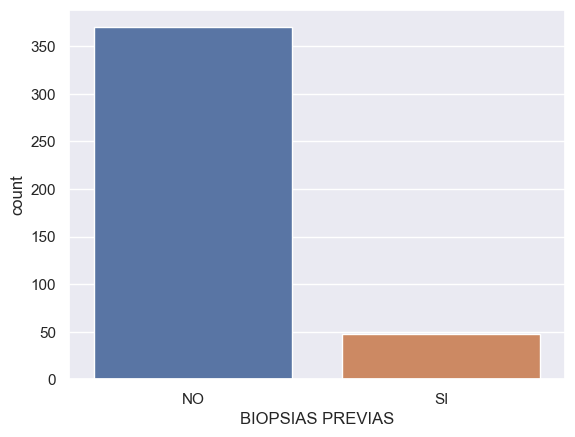

In [127]:
sns.countplot(x='BIOPSIAS PREVIAS', data=h) 
plt.show()

<Axes: xlabel='BIOPSIA'>

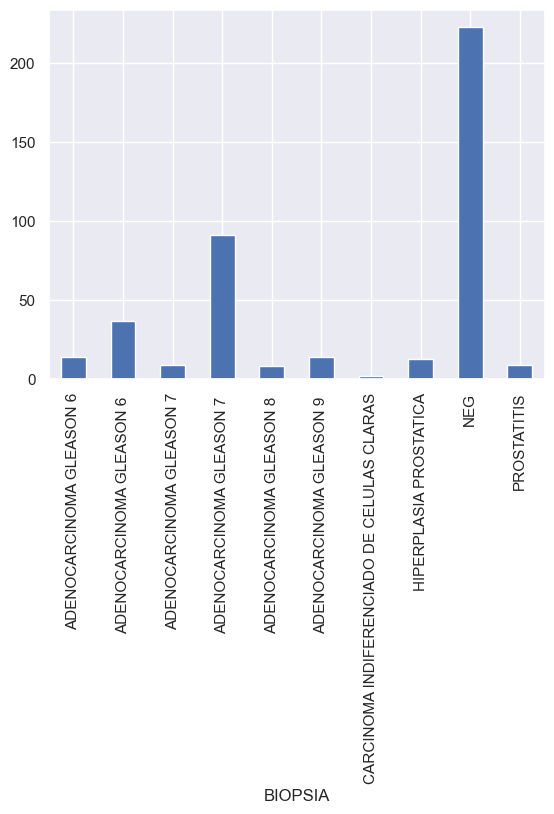

In [128]:
h.groupby("BIOPSIA").size().plot.bar( )

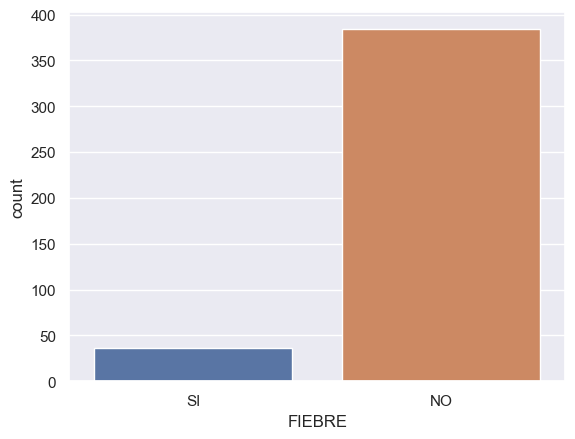

In [129]:
sns.countplot(x='FIEBRE', data=h) 
plt.show()

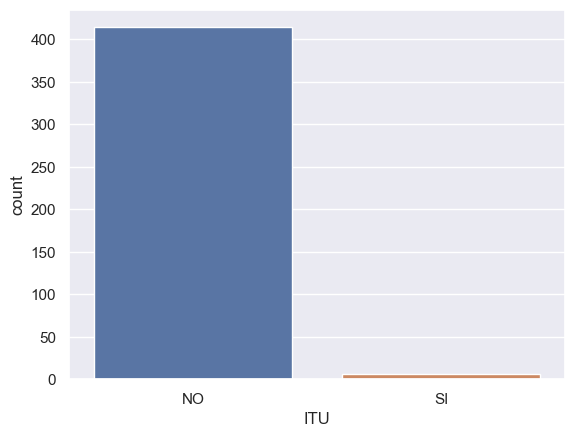

In [130]:
sns.countplot(x='ITU', data=h) 
plt.show()

<Axes: xlabel='TIPO DE CULTIVO'>

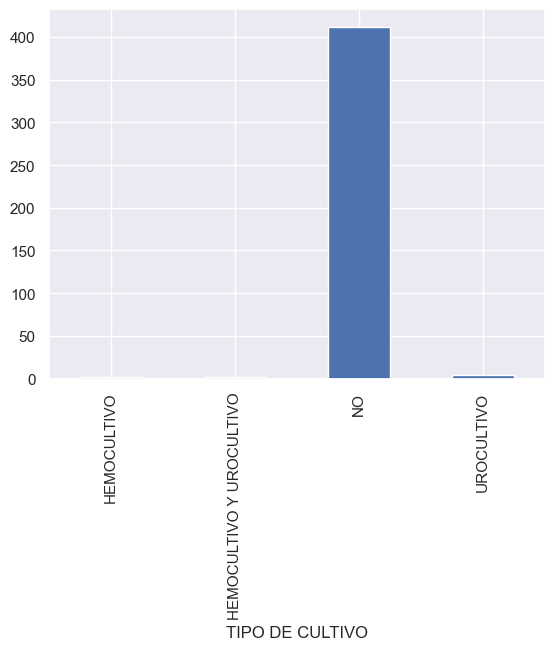

In [131]:
h.groupby("TIPO DE CULTIVO").size().plot.bar( )

<Axes: xlabel='PATRON DE RESISTENCIA'>

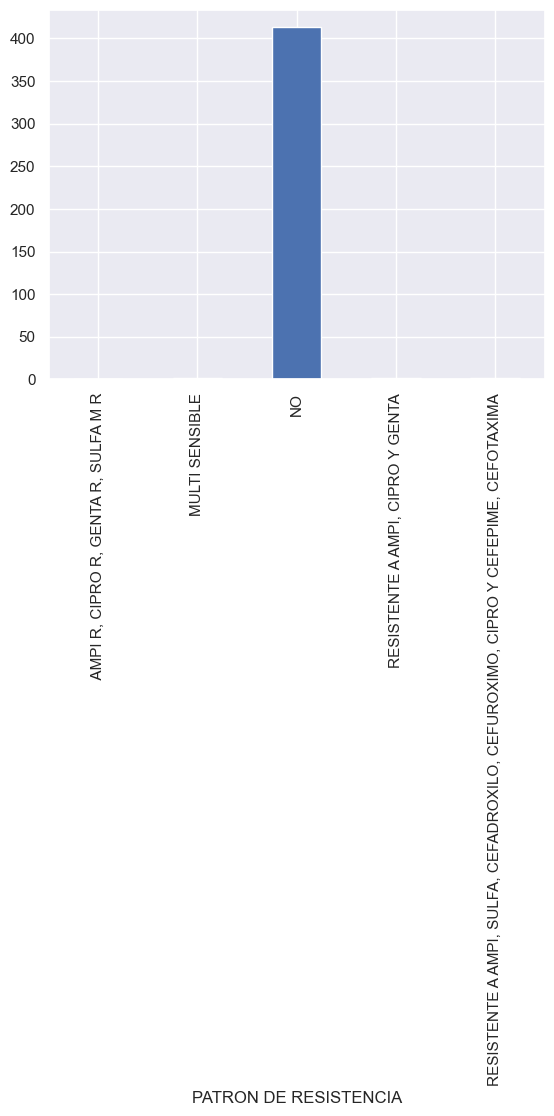

In [132]:
h.groupby("PATRON DE RESISTENCIA").size().plot.bar( )

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [133]:
h

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,AGENTE AISLADO N,HOSPITALIZACION N
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,SI,NO,NO,NO,NO,SI,2.0,0.0,0.000000,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,SI,NO,NO,NO,NO,SI,5.0,0.0,0.000000,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,...,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0,1.000000,0.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,SI,NO,NO,NO,NO,SI,5.0,0.0,0.000000,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,...,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,0.0,0.0,0.000000,1.0
564,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,0.0,0.0,0.000000,1.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,...,NO,NO,NO,NO,NO,NO,0.0,0.0,0.000000,1.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,...,NO,NO,NO,NaN,NO,NO,0.0,0.0,0.022573,1.0


### Eliminación de las columnas no necesarias:
1. HOSPITALIZACION ULTIMO MES
2. BIOPSIAS PREVIAS
3. NUMERO DE MUESTRAS TOMADAS

In [134]:
h = h.drop(['HOSPITALIZACIÓN ULTIMO MES'], axis=1)
h = h.drop(['BIOPSIAS PREVIAS'], axis=1)
h = h.drop(['NUMERO DE MUESTRAS TOMADAS'], axis=1)

In [135]:
h

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,AGENTE AISLADO N,HOSPITALIZACION N
0,53.0,NO,4.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0,0.000000,0.0
1,56.0,NO,7.70,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0,0.000000,0.0
2,57.0,NO,29.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0,1.000000,0.0
3,56.0,NO,7.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0,0.000000,0.0
4,55.0,NO,29.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,NO,6.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,0.000000,1.0
564,64.0,NO,4.80,SI,OTROS,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,0.000000,1.0
565,69.0,NO,4.43,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,0.000000,1.0
566,67.0,NO,8.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0,0.022573,1.0


**Hacemos un gráfico donde se puedan observar las relaciones entre variables y sus histogramas**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


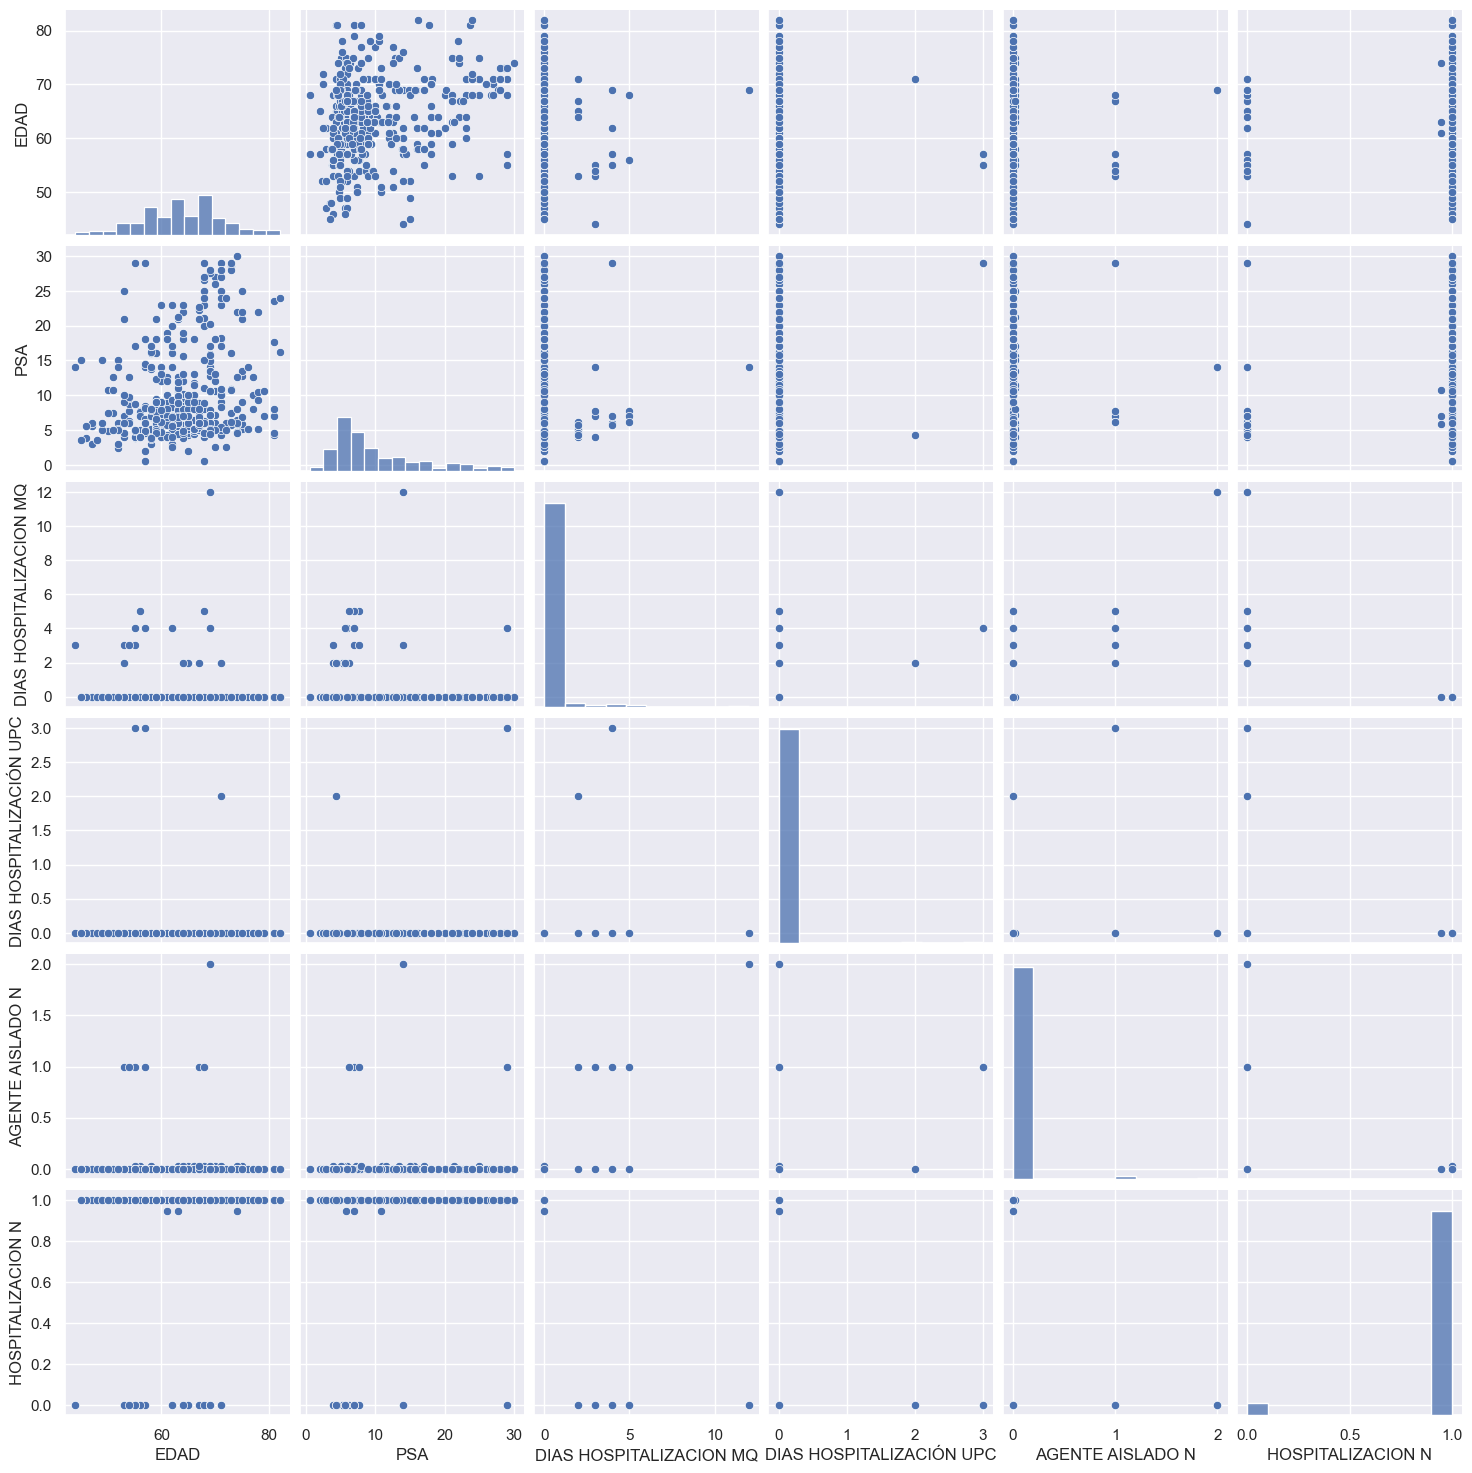

In [136]:
sns.pairplot(h)

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [137]:
EDAD = h['EDAD']
PSA = h['PSA']
DIAS_HOSPITALIZACION_MQ = h['DIAS HOSPITALIZACION MQ']
DIAS_HOSPITALIZACION_UPC = h['DIAS HOSPITALIZACIÓN UPC']
AGENTE_AISLADO_N = h['AGENTE AISLADO N']
HOSPITALIZACION_N = h['HOSPITALIZACION N']

In [138]:
data = {'EDAD':EDAD,
        'PSA':PSA,
        'DIAS_HOSPITALIZACION_MQ':DIAS_HOSPITALIZACION_MQ,
        'DIAS_HOSPITALIZACION_UPC':DIAS_HOSPITALIZACION_UPC,
        'AGENTE_AISLADO_N':AGENTE_AISLADO_N,
        'HOSPITALIZACION_N':HOSPITALIZACION_N}

In [139]:
h = pd.DataFrame (data, columns = ['EDAD', 'PSA', 'DIAS_HOSPITALIZACION_MQ','DIAS_HOSPITALIZACION_UPC','AGENTE_AISLADO_N','HOSPITALIZACION_N'])
h

,EDAD,PSA,DIAS_HOSPITALIZACION_MQ,DIAS_HOSPITALIZACION_UPC,AGENTE_AISLADO_N,HOSPITALIZACION_N
0,53.0,4.00,2.0,0.0,0.000000,0.0
1,56.0,7.70,5.0,0.0,0.000000,0.0
2,57.0,29.00,4.0,3.0,1.000000,0.0
3,56.0,7.00,5.0,0.0,0.000000,0.0
4,55.0,29.00,4.0,3.0,1.000000,0.0
...,...,...,...,...,...,...
563,67.0,6.00,0.0,0.0,0.000000,1.0
564,64.0,4.80,0.0,0.0,0.000000,1.0
565,69.0,4.43,0.0,0.0,0.000000,1.0
566,67.0,8.00,0.0,0.0,0.022573,1.0


In [140]:
h.corr()

,EDAD,PSA,DIAS_HOSPITALIZACION_MQ,DIAS_HOSPITALIZACION_UPC,AGENTE_AISLADO_N,HOSPITALIZACION_N
EDAD,1.000000,0.246943,-0.031081,-0.047456,-0.015314,0.072638
PSA,0.246943,1.000000,0.004048,0.158329,0.076586,0.053251
DIAS_HOSPITALIZACION_MQ,-0.031081,0.004048,1.000000,0.249504,0.799181,-0.818919
DIAS_HOSPITALIZACION_UPC,-0.047456,0.158329,0.249504,1.000000,0.334742,-0.346907
AGENTE_AISLADO_N,-0.015314,0.076586,0.799181,0.334742,1.000000,-0.545342
HOSPITALIZACION_N,0.072638,0.053251,-0.818919,-0.346907,-0.545342,1.000000


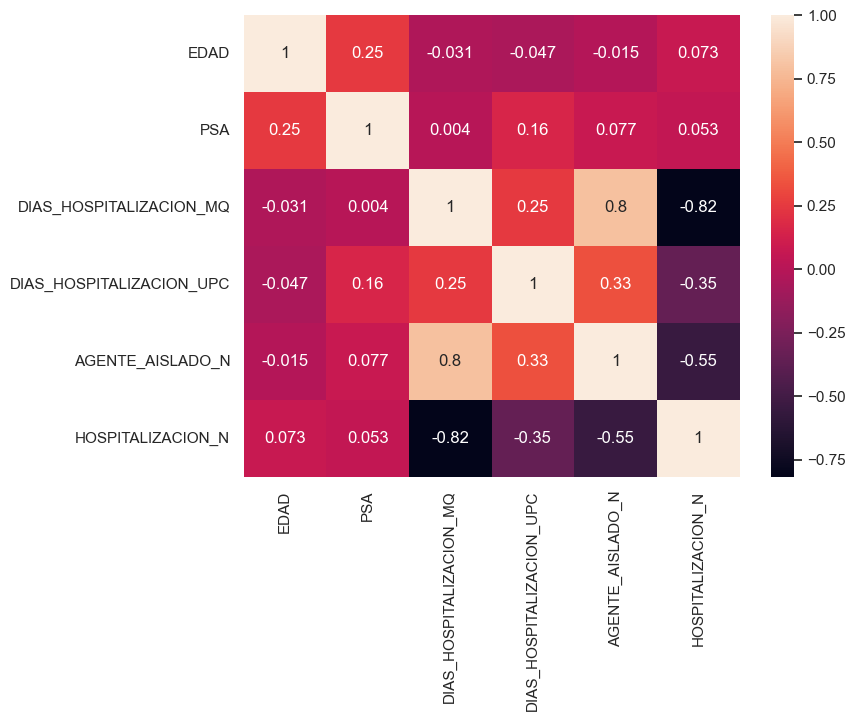

In [141]:
corr_df = h.corr(method="pearson")

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [142]:
h.to_csv('hospitalizacion.csv')